In [1]:
cd /mnt/Data/Scripts/NeuNeuro/src/scripts/

/mnt/Data/Scripts/NeuNeuro/src/scripts


In [4]:
extraPaths=["/home/chenani/pypacks/lib/python2.7/site-packages",
    "/home/chenani/ATLAS-clone/workspace/NeuNeuro/src/scripts/",
    "/home/haas/.local/lib/"]
for p in extraPaths:
    if not sys.path.count(p):
        sys.path.insert(1, p)


In [20]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as pl
import pickle as pkl
import random
import os,sys
import scipy.signal as scsig

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import signale, trajectory, custom_plot

NOTE: There was a problem when loading trajectory.decisions!


In [6]:
def placefield_order(self,placeCellsIDs):
    placeFieldPeaksRight = []
    placeFieldPeaksLeft = []
    placeHistogramsSmoothRight = []
    placeHistogramsSmothLeft = []
    for ii in range(len(placeCellsIDs)):
        placeHistogramR = np.histogram(spikePlaces[:,0],bins)
    hstL = np.histogram(np.intersect1d(spk[idx[ii]].run_spikePlaces[:,0],spk[idx[ii]].links_spikePlaces[:,0]),bins)
    hstSmoothR.append(np.convolve(hstR[0],scsig.gaussian(15,3),'same'))
    hstSmoothL.append(np.convolve(hstL[0],scsig.gaussian(15,3),'same'))
    #hstSmoothR[-1] /= float(hstSmoothR[-1].max())
    #hstSmoothL[-1] /= float(hstSmoothL[-1].max())
    peaksR.append(bins[hstSmoothR[-1].argmax()])
    peaksL.append(bins[hstSmoothL[-1].argmax()])

In [7]:
experimentFolder= '/mnt/Data/ephysdata/Gerbils/G5/'

In [11]:
###################################################### commandline paramters

dummy = sys.argv[1]				# second argument should be the name of the folder to load
#This part is for fixing the path in the windows machines!!!
folderName = dummy.split('\\')[0]
for d in dummy.split('\\')[1:]:
    folderName+='/'+d


# parameters
expType = 'real'
prefix = 'pl'
suffix = ''
noSpeck = False
onlyRunning = False
showHeadDir = False
showFigs = True
saveFigs = True
useRecommended = False
for argv in sys.argv[2:]:
    if argv.startswith('prefix:'):
        prefix=argv.split(':')[-1]  # name prefix
    if argv.startswith('suffix:'):
        suffix=argv.split(':')[-1]  # name suffix
    if argv.startswith('tt:'):                      # Tetrode files to load
        tt = argv.split('tt:')[1].strip('[').strip(']')
        tt = [s for s in tt.split(',')]
    if argv == 'noSpeck':
        noSpeck = True
    if argv=='onlyRunning':
        onlyRunning = True	
    if argv=='showHeadDir':
        showHeadDir = True	# show head direction
    if argv=='noShow':
        showFigs = False	
    if argv=='saveFigs':
        saveFigs = True				# save pics
    if argv=='useRecommended':
        useRecommended = True       # use recommendations from metadata.dat
    if argv.startswith('expType:'):
        expType = argv.split(':')[-1]
    if argv.startswith('threshspeed:'):
        threshspeed = float(argv.split('threshspeed:')[-1])

###################################################### initialization


# initialize in order to make them available globally
spikes = []
ID = -1
stList = signale.placeCellList(t_start=None, t_stop=None, dims=[2])
#stList = signale.spikezugList(t_start=None, t_stop=None, dims=[2])
traj = None
eventData = None

cwd=os.getcwd()


parameters = {'tt': '', 'threshspeed': 1.1}
if useRecommended:
    fileName = os.path.normpath(folderName)+'/metadata.dat'
else:
    fileName = ''
dictio, metadata = signale.get_metadata(fileName, parameters, locals())
locals().update(dictio)


# file endings
TTName = tt
if TTName == ['']:
    TTName = ''
else:
    for i, tt in enumerate(TTName):
        if not tt.endswith('.t'):
            TTName[i] += '.t'


###################################################### functions

def getData(folderName):
    global spikes, ID, traj, eventData

    if os.path.isdir(folderName):
        dirList=os.listdir(folderName)
        os.chdir(folderName)
    else:
        dirList = [folderName]

    for item in dirList:
        if os.path.isfile(item):
            if (TTName.__class__ == list and item in TTName) or\
                    (TTName.__class__ == str and item.endswith(suffix+'.t') and item.startswith(prefix)):
                print 'loading', item , 'from folder: '+folderName
                spikes = signale.load_tFile_place_cell(item, showHeader=False)
                ID += 1
                stList.__setitem__(ID, spikes)
                stList.addTags(ID, file=item, dir=folderName)
            # real
            elif expType == 'real':
                if item.endswith('.nvt'):   ## or item.endswith('2.ncs'):
                    print 'loading', item , 'from folder: '+folderName
                    loadedSomething = True
                    traj = trajectory.load_nvtFile(item, 'linearMaze', showHeader=False)
                    HDtraj = traj[1]        # head direction
                    traj = traj[0]          # trajectory
            # vr
            elif expType == 'vr':
                if item.endswith('.nev'):
                    print 'loading', item , 'from folder: '+folderName
                    eventData = signale.load_nevFile(item, showHeader=False)
                elif item.endswith('.traj') and item.find('position')+1\
                 and not item.find('collisions_position')+1 and not item.find('rewardsVisited_position')+1\
                 and not item.find('events_position')+1:
                    print 'loading', item , 'from folder: '+folderName
                    traj = trajectory.load_trajectory(item, showHeader=False)
        elif os.path.isdir(item):
            getData(item)
    os.chdir('..')

In [12]:
getData(experimentFolder)

loading pl_TT1_01.t from folder: /mnt/Data/ephysdata/Gerbils/G5/
loading pl_TT1_05.t from folder: /mnt/Data/ephysdata/Gerbils/G5/
loading pl_TT1_10.t from folder: /mnt/Data/ephysdata/Gerbils/G5/
loading pl_TT1_13.t from folder: /mnt/Data/ephysdata/Gerbils/G5/
loading pl_TT1_15.t from folder: /mnt/Data/ephysdata/Gerbils/G5/
loading pl_TT2_02.t from folder: /mnt/Data/ephysdata/Gerbils/G5/
loading pl_TT3_02.t from folder: /mnt/Data/ephysdata/Gerbils/G5/
loading pl_TT3_04.t from folder: /mnt/Data/ephysdata/Gerbils/G5/
loading pl_TT3_06.t from folder: /mnt/Data/ephysdata/Gerbils/G5/
loading pl_TT3_07.t from folder: /mnt/Data/ephysdata/Gerbils/G5/
loading pl_TT4_05.t from folder: /mnt/Data/ephysdata/Gerbils/G5/
loading pl_TT4_07.t from folder: /mnt/Data/ephysdata/Gerbils/G5/
loading VT1.nvt from folder: /mnt/Data/ephysdata/Gerbils/G5/


In [13]:
stList._placeCellList__recalc_startstop()
stList.changeTimeUnit('s')

In [15]:
traj.threshspeed = 1.1  # minimum speed for trajectory as running (m/s)

traj.getTrajDimensions()
traj.getRunningTraj()
traj.getLeftAndRightwardRuns(onlyRunning=onlyRunning)

calculating trajectory with running speed >= 1.1


In [16]:
traj.getLeftAndRightwardRuns()
for item in stList:
    item.traj = traj

In [17]:
szug = stList[1]

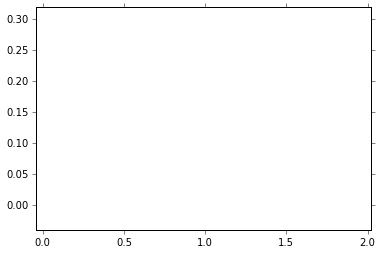

In [22]:
zugRun = szug.get_runSpikes(1.2)

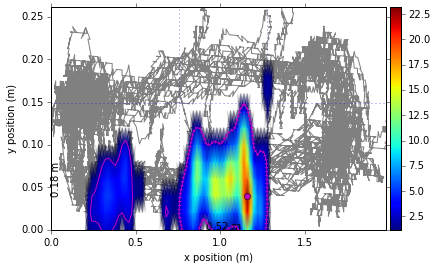

In [23]:
zugRun.plotPlaceField()

In [27]:
zugRun.getSpikePlaces()
zugRun.getLeftAndRightwardSpikes()


Lzug = zugRun[0]
Rzug = zugRun[1]

AttributeError: 'placeCell_spikezug' object has no attribute 'spike_places'

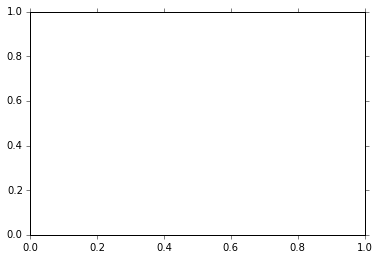

In [30]:
Rzug.plotPlaceField(traj);

In [31]:
zugRun.getSpikePlaces()
zugRun.getLeftAndRightwardSpikes()

In [32]:
Lzug = zugRun[1]
Rzug = zugRun[2]

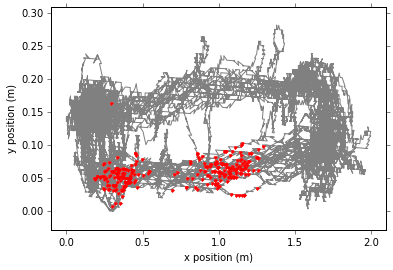

In [36]:
Lzug.plotSpikesvsPlace(traj);

calculating trajectory with running speed >= 2


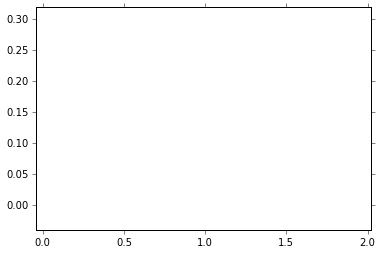

In [44]:
for zug in stList:
    zug = szug.get_runSpikes(2)
    zug.getLeftAndRightwardSpikes()

In [45]:
wws = stList[1]

In [46]:
traj.t_start,traj.t_stop


(1491.943861, 2102.3458050000004)

In [47]:
wws.getLeftAndRightwardSpikes()

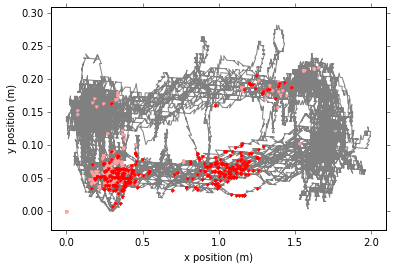

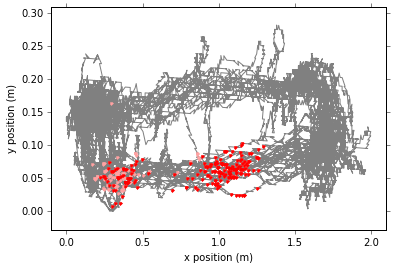

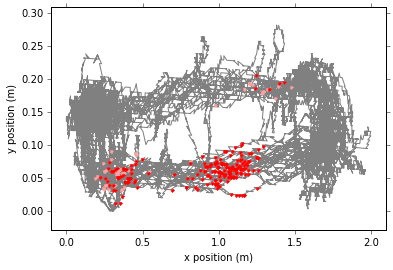

In [48]:
for item in wws:
    item.getSpikePlaces(traj)
    item.plotSpikesvsPlace(traj)

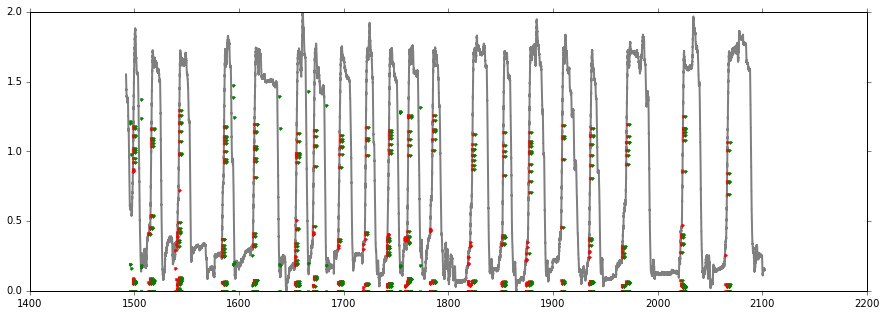

In [66]:
f,ax = pl.subplots(1,1,figsize = [15,5])
ax.plot(traj.times,traj.places[:,0],'k',alpha=0.5);
ax.plot(Lzug.spike_times,Lzug.spike_places,'r.');
ax.plot(Rzug.spike_times+2,Rzug.spike_places,'g.');


In [11]:
pkl.dump(stList,open(experimentFolder + 'LinearSleep.spk','wb'),pkl.HIGHEST_PROTOCOL)

In [9]:
with open(experimentFolder + 'abc.def','rb') as f:
    pkl.dump(stList,f,pkl.HIGHEST_PROTOCOL)

IOError: [Errno 2] No such file or directory: '/mnt/Data/ephysdata/Gerbils/G5/abc.def'